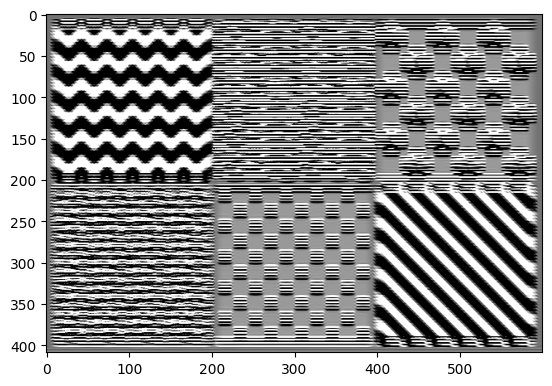

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

ksize = 15  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 5 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/2  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi/4  #1/4 works best for angled. 
gamma=0.9  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0.8  #Phase offset. I leave it to 0. (For hidden pic use 0.8)


kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

#img = cv2.imread('images/synthetic.jpg')
#img = cv2.imread('images/zebra.jpg')  #Image source wikipedia: https://en.wikipedia.org/wiki/Plains_zebra
img = cv2.imread('sythetic.jpg') #USe ksize:15, s:5, q:pi/2, l:pi/4, g:0.9, phi:0.8
plt.imshow(img, cmap='gray')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (400, 400))                    # Resize image


plt.imshow(kernel_resized)
plt.imshow(fimg, cmap='gray')

#cv2.imshow('Kernel', kernel_resized)
#cv2.imshow('Original Img.', img)
#cv2.imshow('Filtered', fimg)
#cv2.waitKey()
#cv2.destroyAllWindows()
#

In [5]:
import numpy as np
import cv2
import pandas as pd
 
#img = cv2.imread('BSE_Image.jpg')
img = cv2.imread('sythetic.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=5  #Try 15 for hidden image. Or 9 for others
                phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                filtered_img = fimg.reshape(-1)
                
                cv2.imwrite('gabor_filtered_images/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                
                num += 1  #Increment for gabor column label
                
print(df.head())

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor106 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor107 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor108 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor109 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor110 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor111 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor112 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor113 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor114 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor115 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor116 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor117 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor118 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor119 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor120 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor121 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor122 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor123 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor124 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor125 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor126 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor127 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor128 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor129 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor130 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor131 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor132 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor133 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor134 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor135 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor136 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor137 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor138 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor139 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor140 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor141 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor142 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor143 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor144 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor145 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor146 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor147 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor148 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor149 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor150 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor151 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor152 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor153 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor154 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor155 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor156 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor157 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor158 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor159 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor160 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor161 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor162 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor163 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor164 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor165 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor166 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor167 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor168 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor169 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor170 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor171 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor172 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor173 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor174 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor175 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor176 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor177 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor178 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor179 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor180 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor181 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor182 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor183 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor184 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor185 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor186 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor187 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor188 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor189 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor190 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor191 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor192 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor193 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor194 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor195 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor196 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor197 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor198 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor199 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor200 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor201 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor202 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor203 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor204 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor205 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor206 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor207 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor208 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor209 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor210 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor211 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor212 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor213 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor214 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor215 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor216 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor217 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor218 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor219 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor220 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor221 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor222 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor223 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor224 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor225 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.05


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor226 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor227 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor228 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor229 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor230 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor231 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor232 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor233 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor234 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor235 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor236 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor237 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor238 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor239 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor240 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor241 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor242 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor243 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor244 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor245 : theta= 5.497787143782138 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor246 : theta= 5.497787143782138 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5


C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

Gabor247 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor248 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor249 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor250 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor251 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor252 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor253 : theta= 5.497787143782138 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor254 : theta= 5.497787143782138 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor255 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor256 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             191       0       0     255     255     160     127      7

C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\ZBT\AppData\Local\Temp\ipykernel_4628\3072615425.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser